# Day 1 - Points

## Plot placenames in Great Britain that contain the Points of a Compass

In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Download OS Zoomstack from https://osdatahub.os.uk/ and read in names layer
myzoom='C:\GIS\Zoomstack\OS_Open_Zoomstack.gpkg'
gdf=gpd.read_file(myzoom, layer = 'names')
gdf.sample(3)

,type,name1,name1language,name2,name2language,geometry
307025,Woodland,Old Cambus Wood,,,,POINT (383306.000 668251.000)
309772,Woodland,Whitmuir Moss,,,,POINT (350369.000 626773.000)
143040,Small Settlements,Barn Owl Cottage,,,,POINT (313175.000 315468.000)


In [3]:
# Check language classifications - 
print (gdf.name1language.value_counts())
print()
print(gdf.name2language.value_counts())

       618310
eng       685
cym         3
gla         1
Name: name1language, dtype: int64

       618310
cym       327
gla       327
eng        33
Name: name2language, dtype: int64


In [4]:
# most name languages not classified - check impact of Welsh points e.g. Gogledd for North
gdf[gdf.name1.str.contains('ogledd')]

,type,name1,name1language,name2,name2language,geometry
127545,Small Settlements,Pant-Y-Gogledd,,,,POINT (249531.000 241481.000)
142938,Small Settlements,Bryn-Gogledd,,,,POINT (304291.000 316908.000)
346732,Landcover,Traeth y Gogledd / North Shore,,,,POINT (278367.000 382640.000)
384510,Landform,Ffridd Bryn-gogledd,,,,POINT (303527.000 317656.000)


In [5]:
# Function to identify compass points in standardised name
def compass(s):
    res = None
    s=s.upper()
    if "NORTH" in s:
        res="North"
    if "SOUTH" in s:
        res="South"
    if "EAST" in s:
        res="East"
    if "WEST" in s:
        res="West"
    return res  

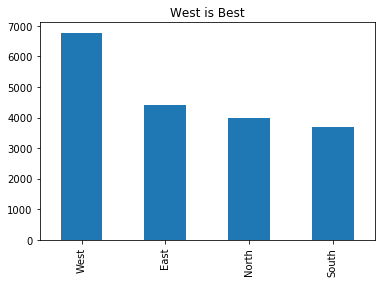

In [6]:
# Apply function to name1 only
gdf['Compass']=gdf.name1.apply(compass)
gdf.Compass.value_counts().plot(kind='bar')
plt.title("West is Best")
plt.show()

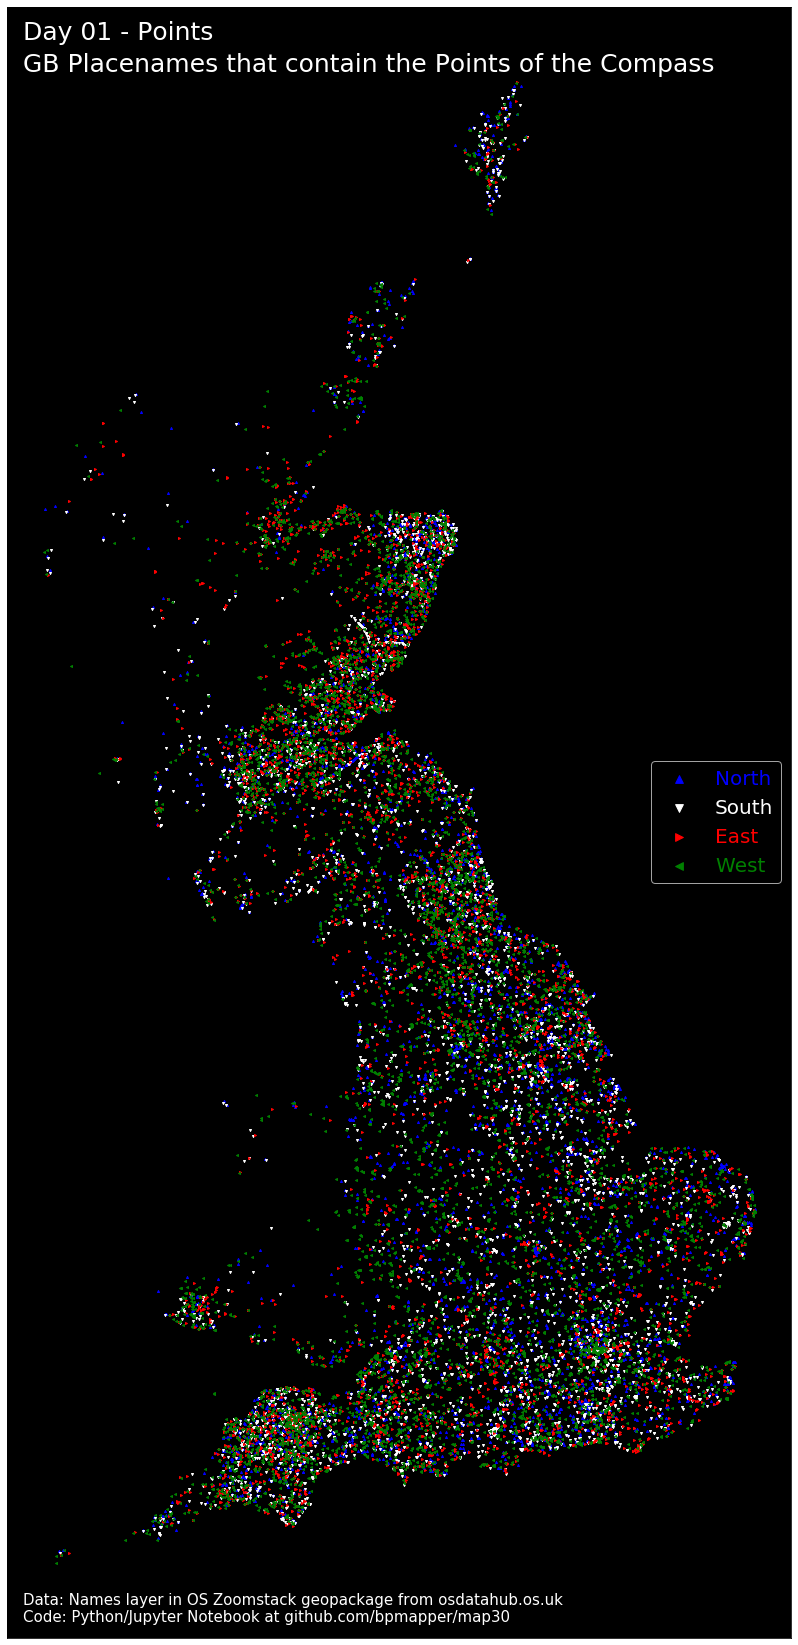

In [13]:
# Draw and format map
msize=4
northcol='blue'
southcol='white'
eastcol='red'
westcol='green'

fig, ax = plt.subplots(figsize=(30,30))
ax.set_facecolor('black')
gdf[gdf.Compass=="North"].plot( ax=ax, marker="^", markersize=msize, color=northcol, label="North")
gdf[gdf.Compass=="South"].plot( ax=ax, marker="v",markersize=msize,color=southcol, label="South")
gdf[gdf.Compass=="East"].plot( ax=ax, marker=">",markersize=msize, color=eastcol,label="East")
gdf[gdf.Compass=="West"].plot( ax=ax, marker="<",markersize=msize,color=westcol,label="West")

leg=plt.legend(loc="center right", facecolor='black', fontsize=20)
text = leg.get_texts()
text[0].set_color(northcol)
text[1].set_color(southcol)
text[2].set_color(eastcol)
text[3].set_color(westcol)
leg.legendHandles[0]._sizes = [60]
leg.legendHandles[1]._sizes = [60]
leg.legendHandles[2]._sizes = [60]
leg.legendHandles[3]._sizes = [60]

ax.text(.02,.98,'Day 01 - Points',transform=ax.transAxes, fontsize=25).set_color('white')
ax.text(.02,.96,'GB Placenames that contain the Points of the Compass',transform=ax.transAxes, fontsize=25).set_color('white')       
ax.text(.02,.02,'Data: Names layer in OS Zoomstack geopackage from osdatahub.os.uk',transform=ax.transAxes, fontsize=15).set_color('white')       
ax.text(.02,.01,'Code: Python/Jupyter Notebook at github.com/bpmapper/map30',transform=ax.transAxes, fontsize=15).set_color('white')       

plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
plt.show()
fig.savefig('Day01_Points.png')

In [8]:
# Types of placenames
gdf.pivot_table('name1',index='type', columns='Compass', aggfunc='count').fillna(0).reset_index().sort_values('West', ascending= False)

Compass,type,East,North,South,West
7,Small Settlements,2335.0,1753.0,1797.0,3370.0
12,Woodland,563.0,641.0,433.0,826.0
6,Sites,236.0,322.0,339.0,594.0
11,Water,315.0,347.0,334.0,411.0
3,Landcover,143.0,202.0,135.0,285.0
1,Greenspace,194.0,197.0,191.0,284.0
8,Suburban Area,143.0,141.0,140.0,284.0
10,Village,196.0,136.0,125.0,267.0
2,Hamlet,139.0,104.0,64.0,231.0
4,Landform,142.0,127.0,110.0,205.0
